# ___Inception - CNN Architecture___

## ___Introduction___

___Inception Net___ _, achieved a milestone in CNN classifiers when previous models were just going deeper to improve the performance and accuracy but compromising the computational cost. The Inception network, on the other hand, is heavily engineered. It __uses a lot of tricks to push performance, both in terms of speed and accuracy__. It is the winner of the ImageNet Large Scale Visual Recognition Competition in 2014, an image classification competition, which has a significant improvement over ZFNet (The winner in 2013), AlexNet (The winner in 2012) and has relatively lower error rate compared with the VGGNet (1st runner-up in 2014)._

_The major issues faced by deeper CNN models such as VGGNet were:_

* _Although, previous networks such as VGG achieved a remarkable accuracy on the ImageNet dataset, deploying these kinds of models is highly computationally expensive because of the deep architecture._
* _Very deep networks are susceptible to overfitting. It is also hard to pass gradient updates through the entire network._

_Its constant evolution lead to the creation of several versions of the network. The popular versions are as follows:_
* ___Inception v1 or Google LeNet___
* ___Inception v2 and Inception v3___
* ___Inception v4 and Inception-ResNet___

_Each version is an iterative improvement over the previous one. Understanding the upgrades can help us to build custom classifiers that are optimized both in speed and accuracy._

_[Paper - Going Deeper with Convolutions](https://arxiv.org/pdf/1409.4842.pdf)_

## ___Inception v1/GoogleLeNet___

_This is where it all started. Let us analyze what problem it was purported to solve, and how it solved it._

* _Salient parts in the image can have extremely large variation in size. For instance, an image with a dog can be either of the following, as shown below. The area occupied by the dog is different in each image._

<img src='https://miro.medium.com/max/512/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg'/>

_From left: A dog occupying most of the image, a dog occupying a part of it, and a dog occupying very little space._

* _Because of this huge variation in the location of the information, choosing the right kernel size for the convolution operation becomes tough. A larger kernel is preferred for information that is distributed more globally, and a smaller kernel is preferred for information that is distributed more locally._
* _Very deep networks are prone to overfitting. It also hard to pass gradient updates through the entire network._
* _Naively stacking large convolution operations is computationally expensive._


___The Solution:___

___Why not have filters with multiple sizes operate on the same level?___ _The __network__ essentially would get a bit __“wider” rather than “deeper”__. The authors designed the inception module to reflect the same._

_The below image is the “naive” inception module. It __performs convolution on an input, with 3 different sizes of filters (1x1, 3x3, 5x5). Additionally, max pooling is also performed__. The outputs are concatenated and sent to the next inception module._

<img src='https://miro.medium.com/max/549/1*m1wn5P5BFZydFgVd3RiZNw.png'/>

_As stated before, deep neural networks are computationally expensive. To make it cheaper, the authors limit the number of input channels by adding an extra 1x1 convolution before the 3x3 and 5x5 convolutions. Though adding an extra operation may seem counterintuitive, 1x1 convolutions are far more cheaper than 5x5 convolutions, and the reduced number of input channels also help. Do note that however, the 1x1 convolution is introduced after the max pooling layer, rather than before._

<img src ='https://miro.medium.com/max/554/1*sezFsYW1MyM9YOMa1q909A.png'/>

_Using the __dimension reduced inception module__, a neural network architecture was built. This was popularly known as __GoogLeNet (Inception v1)__._

___Four Parallel Channels:___

* ___1x1 conv___ _: The input feature map can be reduced in dimension and upgraded without too much loss of the input spatial information._

* ___1x1conv followed by 3x3 conv___ _: 3x3 conv increases the receptive field of the feature map, and changes the dimension through 1x1conv._

* ___1x1 conv followed by 5x5 conv___ _: 5x5 conv further increases the receptive field of the feature map, and changes the dimensions through 1x1 conv._

* ___3x3 max pooling followed by 1x1 conv___ _: The author believes that although the pooling layer will lose space information, it has been effectively applied in many fields, which proves its effectiveness, so a parallel channel is added, and it is changed by 1x1 conv Its output dimension._

### ___The 1×1 Convolution___

_In GoogLeNet, 1×1 convolution is used as a dimension reduction module to reduce the computation. By reducing the computation bottleneck, depth and width can be increased._

___Without the use of 1×1 convolution___
<img src='https://miro.medium.com/max/422/1*s6_8m_0EpwrzZPunRGgFCQ.png'/>

```
Number  of  operations = (14×14×48)×(5×5×480) = 112.9M
```

___With the use of 1×1 convolution:___
<img src='https://miro.medium.com/max/683/1*SJDJyBGM__wRX9wJYIKv8w.png'/>

```
Number of operations for 1×1 = (14×14×16)×(1×1×480) = 1.5M
Number of operations for 5×5 = (14×14×48)×(5×5×16) = 3.8M
Total number of operations = 1.5M + 3.8M = 5.3M

which is much much smaller than 112.9M !
```

___Thus, inception module can be built without increasing the number of operations largely compared the one without 1×1 convolution!___

_1×1 convolution can help to reduce model size which can also somehow help to reduce the overfitting problem!!_

### ___Inception Module___

_In the Inception module, 1×1 conv, 3×3 conv, 5×5 conv, and 3×3 max pooling are done altogether for the previous input, and stack together again at output. When image’s coming in, different sizes of convolutions as well as max pooling are tried. Then different kinds of features are extracted._

_After that, all feature maps at different paths are concatenated together as the input of the next module._

___To allow concatenation at depth the padding is done to maintain the size.___

### ___Global Average Pooling___

<img src='https://miro.medium.com/max/700/1*0-wMHcASLDFzx9YBRCZXHg.png'/>

_Previously, fully connected (FC) layers are used at the end of network, such as in AlexNet. All inputs are connected to each output._
```
Number of weights (connections) above = 7×7×1024×1024 = 51.3M
```
_In GoogLeNet, global average pooling is used nearly at the end of network by averaging each feature map from 7×7 to 1×1, as in the figure above._

```
Number of weights = 0
```

_And authors found that a move from FC layers to average pooling improved the top-1 accuracy by about 0.6%._

___This is the idea make the model less prone to overfitting.___

### ___Overall Architecture___

<img src='https://miro.medium.com/max/1782/1*JQKe6Kd0q8j_yHRF_n7Gog.png'/>

___Detailed:___

<img src='https://www.programmersought.com/images/571/0490b335797927f92358d74baf7da75b.JPEG' width=700/>

_GoogLeNet has 9 such inception modules stacked linearly. It is 22 layers deep (27, including the pooling layers). It uses global average pooling at the end of the last inception module._

_Needless to say, it is a pretty deep classifier. As with any very deep network, it is subject to the vanishing gradient problem._

_Below is the details about the parameters if each layer._

<img src='https://miro.medium.com/max/700/1*lRN3h9a_qJdT6NIy0VOu3Q.png'/>

### ___Auxiliary Classifiers for Training___

_To prevent the middle part of the network from “dying out”, the authors introduced two auxiliary classifiers. They essentially applied softmax to the outputs of two of the inception modules, and computed an auxiliary loss over the same labels. The total loss function is a weighted sum of the auxiliary loss and the real loss. Weight value used in the paper was 0.3 for each auxiliary loss._

```
# The total loss used by the inception net during training.
total_loss = real_loss + 0.3 * aux_loss_1 + 0.3 * aux_loss_2
```
_Authors claim it can be used for combating gradient vanishing problem, also providing regularization._

_Needless to say, auxiliary loss is purely used for training purposes, and is ignored during inference._

### ___Training Methodology___

* _The momentum is set to 0.9 and the learning rate is set to decrease by 4% every 8 epochs._

* _Seven models were trained. To make the problem more detailed, some models were trained on small crops, and some were trained on large crops. (Crops means image sets)_

* _The factors that make the model train well include: the sampling of patches of various sizes in the image, the size of which is evenly distributed between 8% and 100%, and the aspect ratio between 3/4 and 4/3._

## ___Inception v2/BN-Inception (2015)___

_This architecture is a landmark in the development of deep network models. The most prominent contribution is to propose a __normalized Batch Normalization layer to unify the output range of the network__. It is fixed in a relatively uniform range. __If the BN layer is not added, the value range of the network input and output of each layer is greatly different, so the size of the learning rate will be different__. The BN layer avoids this situation. This accelerates the training of the network and gives the network regular terms to a certain extent, reducing the degree of overfitting of the network. In the subsequent development of network models, most models have more or less added BN layers to the model._

### ___Why we need Batch Normalization (BN)?___

_As we should know, the input X is multiplied by weight W and added by bias b and become the output Y at the next layer after an activation function F:_

$$Y=F(W ⋅ X+b)$$

_Previously, F is sigmoid function which is easily saturated at 1 which easily makes the gradient become zero. As the network depth increases, this effect is amplified, and thus slow down the training speed._

_ReLU is then used as F, where ReLU(x)=max(x,0), to address the saturation problem and the resulting vanishing gradients. However, careful initialization, learning rate settings are required._

<img src='https://miro.medium.com/max/576/1*K5oSiPp_gHqCDdm4m6DiVw.png'/>

<center><i> Without BN (Left), With BN (Right)</i></center>

_It is advantageous for the distribution of X to remain fixed over time because a small change will be amplified when network goes deeper._

_BN can reduce the dependence of gradients on the scale of the parameters or their initial values. As a result,_
* ___Higher learning rate can be used___
* ___The need for Dropout can be reduced___

### ___Batch Normalization (BN)___

<img src='https://miro.medium.com/max/510/1*_Yi8TKDpkcbg5pbGttXc9w.png'/>

_During training, we estimate the mean μ and variance σ² of the mini-batch as shown above. And the input is normalized by subtracting the mean μ and dividing it by the standard deviation σ. (The epsilon ε is to prevent denominator from being zero) And additional learnable parameters γ and β are used for scale and shift to have a better shape and position after normalization. And output Y becomes as follows:_

$$Y=F(BN(W ⋅ X+b))$$

_To have a more precise mean and variance, moving average is used to calculate the mean and variance._

_During testing, the mean and variance are calculated using the population._


### ___Architecture___

<img src='https://miro.medium.com/max/512/1*4CkydxRVdkHi9jpOBXnO1A.png'/>

### ___Advantages___

* ___Improved Learning Rate___ _: In the BN model, a higher learning rate is used to accelerate training convergence, but it will not cause other effects. Because if the scale of each layer is different, then the learning rate required by each layer is different. The scale of the same layer dimension often also needs different learning rates. Usually, the minimum learning is required to ensure the loss function to decrease, but The BN layer keeps the scale of each layer and dimension consistent, so you can directly use a higher learning rate for optimization._


* ___Remove the Dropout Layer___ _: The BN layer makes full use of the goals of the dropout layer. Remove the dropout layer from the BN-Inception model, but no overfitting will occur._


* ___Decrease the attenuation coefficient of L2 weight___ _: Although the L2 loss controls the overfitting of the Inception model, the loss of weight has been reduced by five times in the BN-Inception model._


* ___Accelerate the decay of the learning rate___ _: When training the Inception model, we let the learning rate decrease exponentially. Because our network is faster than Inception, we will increase the speed of reducing the learning rate by 6 times._


* ___Remove the local response layer___ _: Although this layer has a certain role, but after the BN layer is added, this layer is not necessary._


* ___Scramble training samples more thoroughly___ _: We scramble training samples, which can prevent the same samples from appearing in a mini-batch. This can improve the accuracy of the validation set by 1%, which is the advantage of the BN layer as a regular term. In our method, random selection is more effective when the model sees different samples each time._


* ___To reduce image distortion___ _: Because BN network training is faster and observes each training sample less often, we want the model to see a more realistic image instead of a distorted image._

## ___Inception v3 (2015)___

_This architecture focuses on how to use the convolution kernel, two or more smaller size of the convolution kernel to replace, but also the introduction of **asymmetrical layers i.e. a convolution dimensional convolution** has also been proposed for pooling layer. Some remedies for loss of spatial information; such as **Label-Smoothing , BN-auxiliary**._

_Experiments were performed on inputs with different resolutions. The results show that although low-resolution inputs require more time to train but the accuracy for both low-resolution and high-resolution achieved are not much different._

_The computational cost is reduced while improving the accuracy of the network._

_Reduce representational bottleneck. The intuition was that, neural networks perform better when convolutions didn’t alter the dimensions of the input drastically. Reducing the dimensions too much may cause loss of information, known as a __“Representational Bottleneck”___.

_Using smart factorization methods, convolutions can be made more efficient in terms of computational complexity._

### ___Factorizing Convolutions___

_The aim of factorizing Convolutions is to reduce the number of connections/parameters without decreasing the network efficiency._

#### ___Factorization Into Smaller Convolutions___

_Two 3×3 convolutions replaces one 5×5 convolution as follows:_

<img src='https://miro.medium.com/max/309/1*cPmPw6iSls-LNXkFrMdelA.png'/>

```
By using 1 layer of 5×5 filter, number of parameters = 5×5=25

By using 2 layers of 3×3 filters, number of parameters = 3×3+3×3=18

Number of parameters is reduced by 28%
```

<img src='https://miro.medium.com/max/609/1*SioPsPvzJcbFdBYd-0ftrQ.png'/>

_Similar technique has been mentioned in VGGNet already._

#### ___Factorization Into Asymmetric Convolutions___

_One 3×1 convolution followed by one 1×3 convolution replaces one 3×3 convolution as follows:_

<img src='https://miro.medium.com/max/212/1*7inCQx9OjMQ5U90dw1a8Bg.png'/>

```
By using 3×3 filter, number of parameters = 3×3=9

By using 3×1 and 1×3 filters, number of parameters = 3×1+1×3=6

Number of parameters is reduced by 33%
```
_You may ask why we don’t use two 2×2 filters to replace one 3×3 filter?_

```
If we use two 2×2 filters, number of parameters = 2×2×2=8

Number of parameters is only reduced by 11%
```
_With this technique, one of the new Inception modules (I call it Inception Module B here) becomes:_
<img src='https://miro.medium.com/max/576/1*-djBF7AjzFNug1ZnVrv_2g.png'/>

_And Inception module C (__filter banks__) is also proposed for promoting high dimensional representations according to author descriptions as follows:_

<img src='https://miro.medium.com/max/508/1*77YxO_lknTTMcuqnJHfXJw.png'/>

_Thus, authors suggest these 3 kinds of Inception Modules. With factorization, number of parameters is reduced for the whole network, it is less likely to be overfitting, and consequently, the network can go deeper!_

### ___Auxiliary Classifier___

_Auxiliary Classifiers were already suggested in GoogLeNet / Inception-v1. There are some modifications in Inception-v3._

_Only 1 auxiliary classifier is used on the top of the last 17×17 layer, instead of using 2 auxiliary classifiers. (The overall architecture would be shown later.)_

<img src='https://miro.medium.com/max/545/1*i6ZTVwrsqHV1xGrG3odgCg.png'/>

_The purpose is also different. In GoogLeNet / Inception-v1, auxiliary classifiers are used for having deeper network. In Inception-v3, auxiliary classifier is used as regularizer. So, actually, in deep learning, the modules are still quite intuitive._

_Batch normalization, suggested in Inception-v2, is also used in the auxiliary classifier._

### ___Efficient Grid Size Reduction___

_Conventionally, such as AlexNet and VGGNet, the feature map downsizing is done by max pooling. But the drawback is either too greedy by max pooling followed by conv layer, or too expensive by conv layer followed by max pooling. Here, an efficient grid size reduction is proposed as follows:_

<img src='https://miro.medium.com/max/576/1*_Z-bkIqq41WHaX4VqcVwNg.png'/>

<center><i>Conventional downsizing (Top Left), Efficient Grid Size Reduction (Bottom Left), Detailed Architecture of Efficient Grid Size Reduction (Right)</i></center>

_With the efficient grid size reduction, 320 feature maps are done by conv with stride 2. 320 feature maps are obtained by max pooling. And these 2 sets of feature maps are concatenated as 640 feature maps and go to the next level of inception module._

_Less expensive and still efficient network is achieved by this efficient grid size reduction._

### ___Overall Architecture___

<img src='https://miro.medium.com/max/576/1*gqKM5V-uo2sMFFPDS84yJw.png'/>

_With 42 layers deep, the computation cost is only about 2.5 higher than that of GoogLeNet, and much more efficient than that of VGGNet._

### ___Label Smoothing As Regularization___

_The purpose of label smoothing is to prevent the largest logit from becoming much larger than all others:_

$$new labels = (1 — ε) * one hot labels + ε / K$$

_where ε is 0.1 which is a hyperparameter and K is 1000 which is the number of classes. A kind of dropout effect observed in classifier layer._

### ___Inception v3 vs Inception v2___

_Inception Net v3 incorporated the following:_

* ___RMSProp Optimizer.___


* ___Factorized 7x7 convolutions.___


* ___BatchNorm in the Auxillary Classifiers.___


* ___Label Smoothing (A type of regularizing component added to the loss formula that prevents the network from becoming too confident about a class. Prevents over fitting).___

## ___Inception v4 and Inception-ResNet (2016)___

_Inception V4 was introduced in combination with Inception-ResNet by thee researchers a Google in 2016. The main aim of the paper was to reduce the complexity of Inception V3 model which give the state-of-the-art accuracy on ILSVRC 2015 challenge. This paper also explores the possibility of using residual networks on Inception model._

### ___Pure Inception architecture (Inception -V4):___

* _The initial set of layers which the paper refers “stem of the architecture” was modified to make it more uniform . These layers are used before Inception block in the architecture._

* _This model can be trained without partition of replicas unlike the previous versions of inceptions which required different replica in order to fit in memory. This architecture use memory optimization on back propagation to reduce the memory requirement._

* _Inception v4 introduced specialized __“Reduction Blocks”__ which are used to change the width and height of the grid. The earlier versions didn’t explicitly have reduction blocks, but the functionality was implemented._

<img src='https://www.aiuai.cn/uploads/sina/5ce8dff18939f.jpg'/>

### ___Inception-ResNet v1 and v2___
_Inspired by the performance of the ResNet, a hybrid inception module was proposed. There are two sub-versions of Inception ResNet, namely v1 and v2. Before we checkout the salient features, let us look at the minor differences between these two sub-versions._
* _Inception-ResNet v1 has a computational cost that is similar to that of Inception v3._
* _Inception-ResNet v2 has a computational cost that is similar to that of Inception v4._
* _They have different stems._
* _Both sub-versions have the same structure for the modules A, B, C and the reduction blocks. Only difference is the hyper-parameter settings._

___Objective:___ _Introduce residual connections that add the output of the convolution operation of the inception module, to the input._

___The Solution___
* _For residual addition to work, the input and output after convolution must have the same dimensions. Hence, we use 1x1 convolutions after the original convolutions, to match the depth sizes (Depth is increased after convolution)._
<img src='https://miro.medium.com/max/512/1*WyqyCKA4mP1jsl8H4eHrjg.jpeg'/>
<center><i>(From left) Inception modules A,B,C in an Inception ResNet. Note how the pooling layer was replaced by the residual connection, and also the additional 1x1 convolution before addition.</i></center>


* _The pooling operation inside the main inception modules were replaced in favor of the residual connections. However, you can still find those operations in the reduction blocks. Reduction block A is same as that of Inception v4._
<img src='https://miro.medium.com/max/512/1*QY-g6oMF_6-v7N668HNvvA.jpeg'/>
<center><i>(From Left) Reduction Block A (35x35 to 17x17 size reduction) and Reduction Block B (17x17 to 8x8 size reduction). Refer to the paper for the exact hyper-parameter setting (V,l,k). (Source: Inception v4)</i></center>



* ___Scaling of the Residuals___:_Networks with residual units deeper in the architecture caused the network to “die” if the number of filters exceeded 1000. This situation cannot be prevented by reducing the learning rate or by adding a BN layer. Hence, to increase stability, the authors scaled the residual activations by a value around 0.1 to 0.3._
<img src='https://miro.medium.com/max/203/1*UJONYV4aJqfpkH8LoV9vwg.png'/>
<center><i>Activations are scaled by a constant to prevent the network from dying.</i></center>



* _The original paper didn’t use BatchNorm after summation to train the model on a single GPU (To fit the entire model on a single GPU)._


* _It was found that Inception-ResNet models were able to achieve higher accuracies at a lower epoch._


_The final network layout for both Inception v4 and Inception-ResNet are as follows:_

<img src='https://miro.medium.com/max/512/1*Ed8AfmerIrBtNgsTFZs--A.jpeg'/>
<center><i>The top image is the layout of Inception v4. The bottom image is the layout of Inception-ResNet. (Source: Inception v4)</i></center>

<img src='https://miro.medium.com/max/517/1*cYjhQ05zLXdHn363TsPrLQ.jpeg'/>
<center><i>The top image is the stem of Inception-ResNet v1. The bottom image is the stem of Inception v4 and Inception-ResNet v2. (Source: Inception v4)</i></center>

_The reduction module A in different Inception architecture is similar. The only difference in number of parameters that are defined by table below:_

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200504222436/ReductionAtable.PNG'/>

### ___Overall Architecture___

#### ___Inception ResNet - v1___

<img src='https://www.aiuai.cn/uploads/sina/5ce8dff1a3e04.jpg'/>

#### ___Inception ResNet - v2___

<img src='https://imgs.developpaper.com/imgs/G3TInU.png'/>

### ___Results and Conclusion___

_The top-5 and top-1 error rate of single-crop single-model evaluation of different architectures on the ILSVRC 2012 validation sets are below:_
<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200504212113/ILSVRC-2012-validation-set.PNG'/>

_The top-5 and top-1 error rate of 144-crop (single-model) evaluation of different architectures on the ILSVRC 2012 validation sets are below:_
<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200504212336/multicrop.PNG'/>

## ___Code Implementations___

### ___Implementation of GoogLeNet in Keras___

In [6]:
import keras
import tensorflow as tf

from keras.datasets import cifar10

from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input 
from keras.layers import concatenate, Flatten
from keras.layers import GlobalAveragePooling2D, AveragePooling2D

import cv2 
import numpy as np 

from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [3]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

    # Resize training images
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_valid = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_valid[:,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train, num_classes)
    Y_valid = np_utils.to_categorical(Y_valid, num_classes)
    
    X_train = X_train.astype('float32')
    X_valid = X_valid.astype('float32')

    # preprocess data
    X_train = X_train / 255.0
    X_valid = X_valid / 255.0

    return X_train, Y_train, X_valid, Y_valid

In [ ]:
X_train, y_train, X_test, y_test = load_cifar10_data(224, 224)

In [ ]:
# Creating Inception Module
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), 
                      padding='same', activation='relu', 
                      kernel_initializer=kernel_init, 
                      bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), 
                      padding='same', activation='relu', 
                      kernel_initializer=kernel_init, 
                      bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3, (3, 3), 
                      padding='same', activation='relu', 
                      kernel_initializer=kernel_init, 
                      bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), 
                      padding='same', activation='relu', 
                      kernel_initializer=kernel_init, 
                      bias_initializer=bias_init)(x)
    
    conv_5x5 = Conv2D(filters_5x5, (5, 5), 
                      padding='same', activation='relu', 
                      kernel_initializer=kernel_init, 
                      bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), 
                          strides=(1, 1), 
                          padding='same')(x)
    
    pool_proj = Conv2D(filters_pool_proj, (1, 1), 
                       padding='same', activation='relu', 
                       kernel_initializer=kernel_init, 
                       bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
# Defining GoogleLeNet Architecture

input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', 
           strides=(2, 2), activation='relu', 
           name='conv_1_7x7/2', kernel_initializer=kernel_init,
           bias_initializer=bias_init)(input_layer)

x = MaxPool2D((3, 3), padding='same', 
              strides=(2, 2), 
              name='max_pool_1_3x3/2')(x)

x = Conv2D(64, (1, 1), padding='same', 
           strides=(1, 1), activation='relu', 
           name='conv_2a_3x3/1')(x)

x = Conv2D(192, (3, 3), padding='same', 
           strides=(1, 1), activation='relu', 
           name='conv_2b_3x3/1')(x)

x = MaxPool2D((3, 3), padding='same', 
              strides=(2, 2), 
              name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', 
              strides=(2, 2), 
              name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)

x1 = Conv2D(128, (1, 1), padding='same', 
            activation='relu')(x1)
x1 = Flatten()(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.7)(x1)

x1 = Dense(10, activation='softmax', 
           name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)

x2 = Conv2D(128, (1, 1), padding='same', 
            activation='relu')(x2)

x2 = Flatten()(x2)

x2 = Dense(1024, activation='relu')(x2)

x2 = Dropout(0.7)(x2)

x2 = Dense(10, activation='softmax', 
           name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', 
              strides=(2, 2), 
              name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

In [ ]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [ ]:
model.summary()

In [ ]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 
                    'categorical_crossentropy', 
                    'categorical_crossentropy'], 
              loss_weights=[1, 0.3, 0.3], 
              optimizer=sgd, 
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, [y_train, y_train, y_train], 
                    validation_data=(X_test, [y_test, y_test, y_test]), 
                    epochs=epochs, 
                    batch_size=256, 
                    callbacks=[lr_sc])

In [ ]:
# list all data in history

print(history.history.keys())

In [ ]:
# Summarize Accuracy Improvements

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ___Implementation of Inception-v3 in Keras___

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.datasets import cifar10

In [2]:
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [3]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))

model.add(layers.UpSampling2D((2,2)))

model.add(layers.UpSampling2D((2,2)))

model.add(conv_base)

model.add(layers.Flatten(input_shape=(256,256,3)))

model.add(layers.Dense(128, activation='tanh'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train,
                    y_train, 
                    steps_per_epoch=100, 
                    epochs=20, 
                    batch_size=30, 
                    validation_data=(x_test, y_test))

Epoch 1/20
100/100 [==============================] - 37s 369ms/step - loss: 0.3574 - acc: 0.1833 - val_loss: 0.2493 - val_acc: 0.5016
Epoch 2/20
100/100 [==============================] - 35s 354ms/step - loss: 0.2930 - acc: 0.3237 - val_loss: 0.1890 - val_acc: 0.6331
Epoch 3/20
100/100 [==============================] - 35s 354ms/step - loss: 0.2426 - acc: 0.4623 - val_loss: 0.1545 - val_acc: 0.7208
Epoch 4/20
100/100 [==============================] - 35s 355ms/step - loss: 0.2007 - acc: 0.5873 - val_loss: 0.1296 - val_acc: 0.7744
Epoch 5/20
100/100 [==============================] - 35s 354ms/step - loss: 0.1870 - acc: 0.6323 - val_loss: 0.1102 - val_acc: 0.8134
Epoch 6/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1690 - acc: 0.6853 - val_loss: 0.1030 - val_acc: 0.8270
Epoch 7/20
100/100 [==============================] - 35s 353ms/step - loss: 0.1514 - acc: 0.7383 - val_loss: 0.0875 - val_acc: 0.8553
Epoch 8/20
100/100 [==============================] - 3

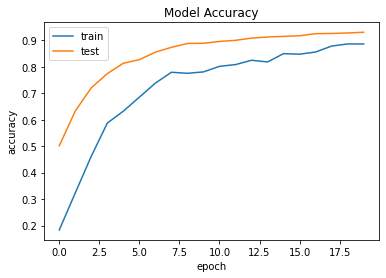

In [9]:
# Summarize Accuracy Improvements

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

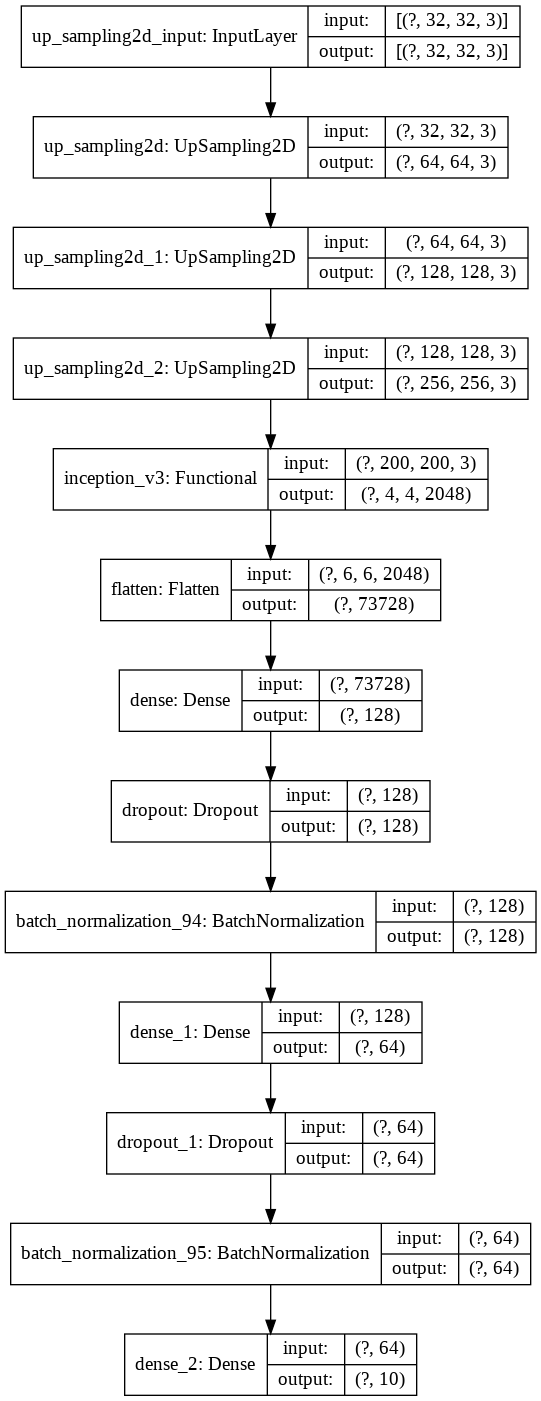

In [7]:
from keras.utils import plot_model
# plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

Input Dimensions - Image :  (500, 500, 3)


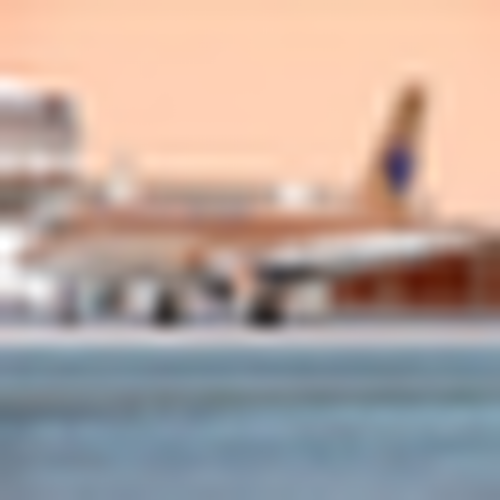

In [6]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img= "http://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png"

input_img = io.imread(input_img)
input_img = cv2.resize(input_img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',input_img.shape)
cv2_imshow(input_img)

In [19]:
input_img = cv2.resize(input_img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

x = image.img_to_array(input_img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

preds = model.predict(x)

class_idx = np.argmax(preds[0])

In [18]:
preds

array([[0.08034474, 0.09922067, 0.01762749, 0.4506759 , 0.13934259,
        0.04664598, 0.01060932, 0.01555689, 0.05406686, 0.08590957]],
      dtype=float32)

In [20]:
class_idx

3

### ___Implementation of Inception ResNet - v2 in Keras___

In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras import *
from keras.models import *
from keras.layers import Input, Dense, Flatten
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.utils.np_utils import to_categorical

In [2]:
# downloading the dataset - Dogs and cats

!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

--2020-10-10 18:06:49--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  26.9MB/s    in 21s     

2020-10-10 18:07:10 (26.1 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [3]:
# Augmenting the Training dataset
from keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(zoom_range=0.2, 
                         shear_range=0.2, 
                         horizontal_flip=True, 
                         rescale=1/255.0)

training_data = idg.flow_from_directory(r"/content/Cat_Dog_data/train", 
                                        target_size = (224, 224))

# Augmenting the Testing dataset

idg = ImageDataGenerator(rescale=1/255.0)

testing_data = idg.flow_from_directory(r"/content/Cat_Dog_data/test", 
                                       target_size = (224, 224))

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [7]:
inception_resnet_v2_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))

input = Input(shape=(224,224,3))

for l in inception_resnet_v2_model.layers:
    l.trainable = False

# Creating Model
model = keras.Sequential()

# Adding pre-trained model layers
model.add(inception_resnet_v2_model)

# Flattening the image pixels
model.add(Flatten())

# Adding 2 dense layers with 4096 neurons
model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.6))

# Adding an output layer with 2 neurons
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the model
result = model.fit_generator(steps_per_epoch=100, 
                             generator=training_data, 
                             verbose=1, 
                             validation_data=testing_data, 
                             epochs=20)

print(model.summary())

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 57s 569ms/step - loss: 2.7259 - accuracy: 0.9694 - val_loss: 0.9616 - val_accuracy: 0.9864
Epoch 2/20
100/100 [==============================] - 54s 544ms/step - loss: 1.6221 - accuracy: 0.9759 - val_loss: 0.9444 - val_accuracy: 0.9848
Epoch 3/20
100/100 [==============================] - 54s 541ms/step - loss: 1.0526 - accuracy: 0.9782 - val_loss: 0.4942 - val_accuracy: 0.9844
Epoch 4/20
100/100 [==============================] - 55s 545ms/step - loss: 0.3395 - accuracy: 0.9866 - val_loss: 0.1664 - val_accuracy: 0.9900
Epoch 5/20
100/100 [==============================] - 55s 549ms/step - loss: 0.2543 - accuracy: 0.9809 - val_loss: 0.0839 - val_accuracy: 0.9888
Epoch 6/20
100/100 [==============================] - 54s 543ms/step - loss: 0.1110 - accuracy: 0.9830 - val_loss: 0.0545 - val_accuracy: 0.9880
Epoch 7/20
100/100 [==============================] - 

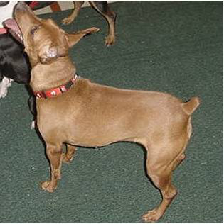

In [14]:
# Load the testing image
test_img = image.load_img(r"/content/Cat_Dog_data/test/dog/dog.10010.jpg", target_size=(224,224))
test_img

In [15]:
# Converting image to array
test_img = np.asarray(test_img)

# Expanding the dimensions
test_img = np.expand_dims(test_img, axis=0)
# Predicting the loaded image
output = model.predict(test_img)

# Condition of checking the label of the loaded or tested image
if output[0][0] > output[0][1]:
    print("Cat")
else:
    print("Dog")

Dog


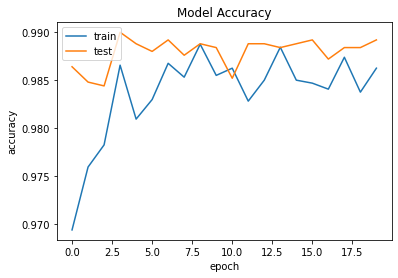

In [16]:
# Summarize Accuracy Improvements

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()